In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import sklearn


# 1. open .csv as dataframe

data = pd.read_csv('../input/autoauto/auto.csv', header=0)
data.head(5)

,Model,Origin,Price,MPG,Hroom,Rseat,Trunk,Weight,Length,Turn,Displa,Gratio
0,AMC Concord,A,4099,22,2.5,27.5,11,2930,186,40,121,3.58
1,AMC Pacer,A,4749,17,3.0,25.5,11,3350,173,40,258,2.53
2,AMC Spirit,A,3799,22,3.0,18.5,12,2640,168,35,121,3.08
3,Audi 5000,E,9690,17,3.0,27.0,15,2830,189,37,131,3.20
4,Audi Fox,E,6295,23,2.5,28.0,11,2070,174,36,97,3.70


In [3]:
# Calculate covariance and correlation between:
# 2.1 MPG and Weight

df = pd.DataFrame({"MPG":[22, 17, 22, 17, 23],  
                   "WEIGHT":[2390, 3350, 2640, 2830, 2070]}) 
# covariance
print(df.cov())


           MPG    WEIGHT
MPG        8.7   -1231.5
WEIGHT -1231.5  231580.0


In [9]:
data[["MPG", "Weight"]].cov()

,MPG,Weight
MPG,33.472047,-3732.025176
Weight,-3732.025176,614492.484265


In [4]:
# 2.2 Weight and Length

df = pd.DataFrame({"WEIGHT":[2390, 3350, 2640, 2830, 2070],  
                   "LENGTH":[186, 173, 168, 189, 174]}) 
# covariance
print(df.cov())


          WEIGHT  LENGTH
WEIGHT  231580.0  -295.0
LENGTH    -295.0    81.5


In [10]:
data[["Weight", "Length"]].cov()

,Weight,Length
Weight,614492.484265,16777.615698
Length,16777.615698,502.091262


In [5]:
# 2.3 Price and Weight

df = pd.DataFrame({"PRICE":[4099, 4749, 3799, 9690, 6295],  
                   "WEIGHT":[2390, 3350, 2640, 2830, 2070]}) 
# covariance
print(df.cov())


            PRICE    WEIGHT
PRICE   5838010.8   35469.5
WEIGHT    35469.5  231580.0


In [11]:
data[["Price", "Weight"]].cov()

,Price,Weight
Price,8.632196e+06,1.270005e+06
Weight,1.270005e+06,6.144925e+05


In [12]:
# 3. Which two dimensions in the whole data has the highest correlation?
# closest to zero, therefore highest correlation.

NameError: name 'crossCorrelation' is not defined

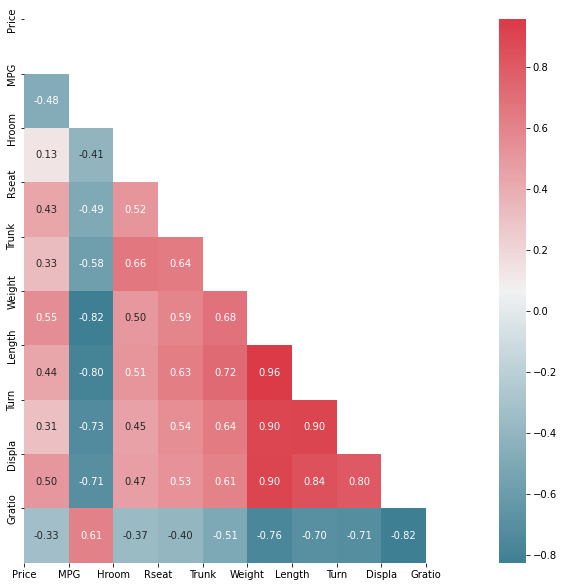

In [16]:
crossCorrelation(data.iloc[:,2::], mirror=False, correlation=True, scaling=False)

def crossCorrelation(df, mirror, correlation=True, scaling=False):
    
    import seaborn as sns
    import numpy as np
    import matplotlib.pyplot as plt 
    from sklearn import preprocessing
    
    if scaling==True:
        x = df.values #returns a numpy array
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        df = pd.DataFrame(x_scaled, columns=df.columns)
    
    # Create Correlation df
    if correlation==True:
        corr = df.corr()
    else :
        corr = df.cov()
    # Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    # Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
    if mirror == True:
        #Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
        #Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
        #Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
        #show plot

    else:
        # Drop self-correlations
        dropSelf = np.zeros_like(corr)
        dropSelf[np.triu_indices_from(dropSelf)] = True
        # Generate Color Map
        colormap = sns.diverging_palette(220, 10, as_cmap=True)
        # Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
        # Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
        # Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
    # show plot
    plt.show()

In [6]:
# covariance
data[["MPG", "Weight"]].cov()

,MPG,Weight
MPG,33.472047,-3732.025176
Weight,-3732.025176,614492.484265


In [7]:
# mean
data[["MPG", "Weight"]].mean()

MPG         21.297297
Weight    3010.810811
dtype: float64

In [8]:
# correlation
data[["MPG", "Weight"]].corr()

,MPG,Weight
MPG,1.000000,-0.822896
Weight,-0.822896,1.000000
